# Use OPCSIM to simulate the effect of RH on an Ammonium Sulfate Distribution

In [1]:
import opcsim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set("paper", "ticks", font_scale=1.75)

## Create a synthesized dataset using opcsim

In [2]:
d = opcsim.AerosolDistribution("Delhi")

d.add_mode(n=1.19e2, gm=376e-3, gsd=1.9, kappa=0.53, rho=1.77)

bins = np.array([[0.38, 0.54], [0.54, 0.78], [0.78, 1.05]])

opc = opcsim.OPC(bins=opcsim.midpoints(bins))

## Make the figure

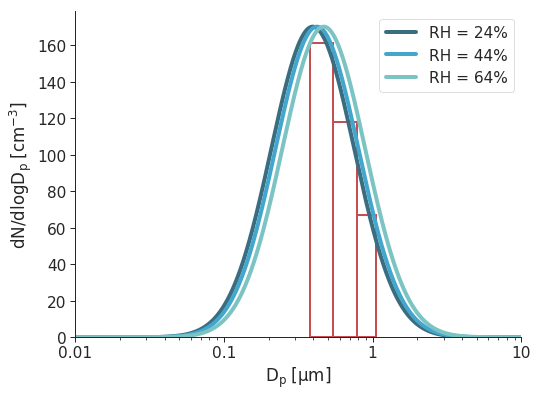

In [3]:
cpal = sns.color_palette("GnBu_d", 3)

fig, ax = plt.subplots(1, figsize=(8, 6))

ax = opcsim.plots.pdfplot(d, rh=24.0, ax=ax, weight='number', label="RH = 24%", plot_kws=dict(color=cpal[0]))
ax = opcsim.plots.pdfplot(d, rh=44.0, ax=ax, weight='number', label="RH = 44%", plot_kws=dict(color=cpal[1]))
ax = opcsim.plots.pdfplot(d, rh=64.0, ax=ax, weight='number', label="RH = 64%", plot_kws=dict(color=cpal[2]))

ax = opcsim.plots.histplot(opc.evaluate(d), bins=opc.bins, ax=ax, plot_kws={"linewidth": 2})

ax.legend()
ax.set_ylim(0, None)
ax.set_xlim(0.01, 10)

sns.despine()

fig.savefig("opc-amm-sulf-delhi.png", transparent=True, dpi=350)